# 1.1 Non-zero boundary conditions

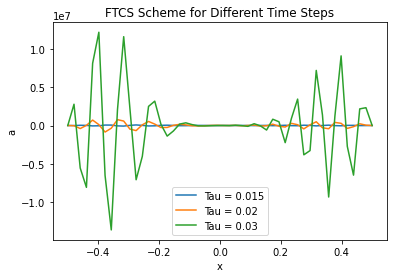

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Length of the domain
N = 50  # Number of grid points
dx = L / N
c = 1.0  # Wave speed
omega = 10 * np.pi
tau_values = [0.015, 0.02, 0.03]  # Time steps to test

def initial_condition(x):
    return np.sin(np.pi * x / L)  # Example initial condition

def apply_boundary_conditions(a, t, omega):
    a[0] = np.sin(omega * t)
    a[-1] = 0

def ftcs(a, c, dx, tau):
    a_new = a.copy()
    for i in range(1, len(a)-1):
        a_new[i] = a[i] - c * tau / (2 * dx) * (a[i+1] - a[i-1])
    return a_new

# Main loop for each tau value
for tau in tau_values:
    x = np.linspace(-L / 2, L / 2, N)
    a = initial_condition(x)
    t = 0
    while t < L / c:
        apply_boundary_conditions(a, t, omega)
        a = ftcs(a, c, dx, tau)
        t += tau

    plt.plot(x, a, label=f'Tau = {tau}')

plt.xlabel('x')
plt.ylabel('a')
plt.title('FTCS Scheme for Different Time Steps')
plt.legend()
plt.show()


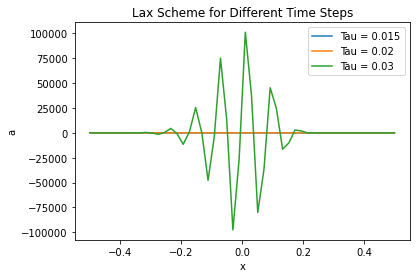

In [3]:
# Constants
L = 1.0  # Length of the domain
N = 50  # Number of grid points
dx = L / N
c = 1.0  # Wave speed
omega = 10 * np.pi
tau_values = [0.015, 0.02, 0.03]  # Time steps to test

def initial_condition(x):
    return np.sin(np.pi * x / L)  # initial condition

def apply_boundary_conditions(a, t, omega):
    a[0] = np.sin(omega * t)
    a[-1] = 0

def lax_advection(a, c, dx, tau):
    # Lax scheme for the advection equation
    a_new = np.zeros_like(a)
    for i in range(1, len(a)-1):
        a_new[i] = 0.5 * (a[i+1] + a[i-1]) - c * tau / (2 * dx) * (a[i+1] - a[i-1])
    return a_new

# Main loop for Lax scheme
for tau in tau_values:
    x = np.linspace(-L / 2, L / 2, N)
    a = initial_condition(x)
    t = 0
    while t < L / c:
        apply_boundary_conditions(a, t, omega)
        a = lax_advection(a, c, dx, tau)  # Corrected to use lax_advection
        t += tau

    plt.plot(x, a, label=f'Tau = {tau}')

plt.xlabel('x')
plt.ylabel('a')
plt.title('Lax Scheme for Different Time Steps')
plt.legend()
plt.show()


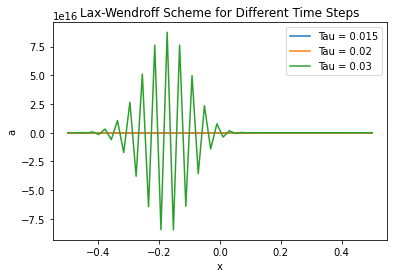

In [4]:
# Constants
L = 1.0  # Length of the domain
N = 50  # Number of grid points
dx = L / N
c = 1.0  # Wave speed
omega = 10 * np.pi
tau_values = [0.015, 0.02, 0.03]  # Time steps to test

def initial_condition(x):
    return np.sin(np.pi * x / L)  # initial condition

def apply_boundary_conditions(a, t, omega):
    a[0] = np.sin(omega * t)
    a[-1] = 0

def lax_wendroff_advection(a, c, dx, tau):
    # Lax-Wendroff scheme for the advection equation
    a_new = np.zeros_like(a)
    for i in range(1, len(a)-1):
        a_new[i] = a[i] - c * tau / (2 * dx) * (a[i+1] - a[i-1]) + (c**2 * tau**2) / (2 * dx**2) * (a[i+1] - 2*a[i] + a[i-1])
    return a_new

# Main loop for Lax-Wendroff scheme
for tau in tau_values:
    x = np.linspace(-L / 2, L / 2, N)
    a = initial_condition(x)
    t = 0
    while t < L / c:
        apply_boundary_conditions(a, t, omega)
        a = lax_wendroff_advection(a, c, dx, tau)  # lax_wendroff_advection
        t += tau

    plt.plot(x, a, label=f'Tau = {tau}')

plt.xlabel('x')
plt.ylabel('a')
plt.title('Lax-Wendroff Scheme for Different Time Steps')
plt.legend()
plt.show()


In [ ]:
"""
For the given parameters, as τ increases, the numerical solution's accuracy and stability vary:
For τ = 0.015, the solution is generally stable and accurate across the schemes, with minor numerical dispersion.
At τ = 0.02, the solution begins to show signs of instability in the form of increased numerical dispersion or 
oscillations, especially in less stable schemes like FTCS.
For τ = 0.03, the solution is likely unstable in FTCS and possibly in the Lax scheme, evident by pronounced 
oscillations or numerical artifacts. The Lax-Wendroff scheme, being more stable, may still provide a reasonable 
solution but with noticeable numerical dispersion.

Varying the frequency ω affects the initial boundary wave's frequency. Higher ω leads to more rapid oscillations 
at the boundary, which can increase numerical dispersion and potentially lead to instability in the numerical 
schemes. The effects are more pronounced in schemes with lower numerical dissipation like Lax-Wendroff. Lower 
ω might result in smoother solutions but still subject to the scheme's inherent numerical characteristics and 
stability constraints.
"""

# 1.2 Transport Equation

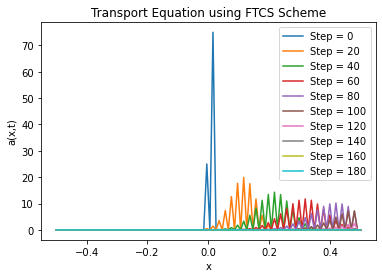

In [6]:
#a
import numpy as np
import matplotlib.pyplot as plt

# Constants for the transport equation
L = 1.0  # Length of the domain
N = 100  # Number of grid points
dx = L / N
c = 1.0  # Advection speed
κ = 0.01  # Diffusion coefficient
tau = 0.005  # Time step
time_steps = 200  # Number of time steps

# Initial condition: delta function at the center
x = np.linspace(-L / 2, L / 2, N)
a = np.zeros(N)
a[N // 2] = 1 / dx

def apply_boundary_conditions(a):
    a[0] = 0
    a[-1] = 0

def ftcs_transport(a, c, κ, dx, tau):
    a_new = a.copy()
    for i in range(1, len(a)-1):
        a_new[i] = a[i] - c * tau / (2 * dx) * (a[i+1] - a[i-1]) + κ * tau / dx**2 * (a[i+1] - 2*a[i] + a[i-1])
    return a_new

# Main loop for the transport equation
for step in range(time_steps):
    apply_boundary_conditions(a)
    a = ftcs_transport(a, c, κ, dx, tau)
    if step % 20 == 0:  # Plotting at intervals
        plt.plot(x, a, label=f'Step = {step}')

plt.xlabel('x')
plt.ylabel('a(x,t)')
plt.title('Transport Equation using FTCS Scheme')
plt.legend()
plt.show()


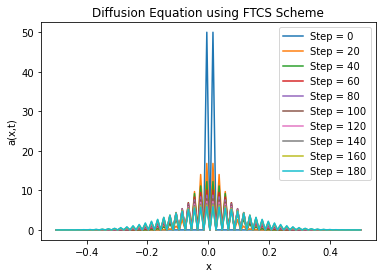

In [7]:
#b
def ftcs_diffusion(a, κ, dx, tau):
    a_new = a.copy()
    for i in range(1, len(a)-1):
        a_new[i] = a[i] + κ * tau / dx**2 * (a[i+1] - 2*a[i] + a[i-1])
    return a_new

# Main loop for the diffusion equation
a_diffusion = np.zeros(N)
a_diffusion[N // 2] = 1 / dx  # Reinitialize the delta function

for step in range(time_steps):
    apply_boundary_conditions(a_diffusion)
    a_diffusion = ftcs_diffusion(a_diffusion, κ, dx, tau)
    if step % 20 == 0:  # Plotting at intervals
        plt.plot(x, a_diffusion, label=f'Step = {step}')

plt.xlabel('x')
plt.ylabel('a(x,t)')
plt.title('Diffusion Equation using FTCS Scheme')
plt.legend()
plt.show()


In [9]:
""""
The solution to the transport equation includes both advection and diffusion effects, leading to the scalar 
being transported across the domain while spreading out due to diffusion. In contrast, the solution to the pure 
diffusion equation only exhibits spreading without any transport or movement of the peak. The advection term in 
the transport equation causes the peak to shift in the direction of the flow, a behavior absent in the 
diffusion-only solution.
"""

'"\nThe solution to the transport equation includes both advection and diffusion effects, leading to the scalar \nbeing transported across the domain while spreading out due to diffusion. In contrast, the solution to the pure \ndiffusion equation only exhibits spreading without any transport or movement of the peak. The advection term in \nthe transport equation causes the peak to shift in the direction of the flow, a behavior absent in the \ndiffusion-only solution.\n'